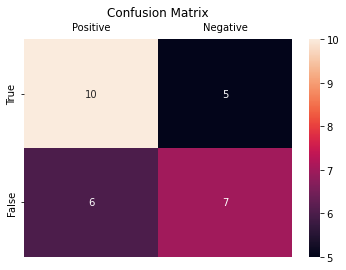

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt     

conf_mat = [[10, 5], [6, 7]]
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.rcParams['xtick.top'] = False
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Positive', 'Negative']); 
ax.yaxis.set_ticklabels(['True', 'False']);



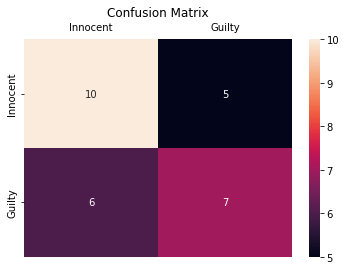

In [56]:
conf_mat = [[10, 5], [6, 7]]
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.rcParams['xtick.top'] = False
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Innocent', 'Guilty']); 
ax.yaxis.set_ticklabels(['Innocent', 'Guilty']);

In [57]:
# True Positive: The person is innocent and the judge identifies the person as innocent
# Type 2 error True Negative: The person is innocent and the judge identifies the person as guilty
# Type 1 error False Positive: The person is guilty and the judge identifies the person as innocent
# False Negative: The person is guilty and the judge identifies the person as guilty

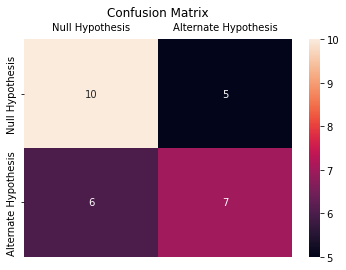

In [59]:
conf_mat = [[10, 5], [6, 7]]
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True);  #annot=True to annotate cells, ftm='g' to disable scientific notation
plt.rcParams['xtick.top'] = False
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Null Hypothesis', 'Alternate Hypothesis']); 
ax.yaxis.set_ticklabels(['Null Hypothesis', 'Alternate Hypothesis']);
# True Positive = 1- alpha (95% or .95 Probability)
# True Negative = Type 2 error = 5
# False Positive = Type 1 error = 6 = alpha(5% or .05 Probability) 

In [69]:
# Steps to perform Hypothesis Testing:

# Set the Hypothesis
# Set the Significance Level, Criteria for a decision
# Compute the test statistics
# Make a decision

In [70]:
# z = ((sample mean) - (population mean)) / (sd of population / sqrt(n))

In [71]:
z = -1.39

In [72]:
# Find the table for finding p value
p = 0.0823

# p > significance level
p > 0.05

# Accept the null hypothesis  There is no problem with public hospital

True

In [73]:
import pandas as pd
import numpy as np
corona = pd.read_csv('Corona_Updated.csv')
# Null Hypothesis: Temperature doesn’t affect COV-19 Outbreak
# Alternate Hypothesis: Temperature does affect COV-19 Outbreak
corona

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Temprature,Humidity,Temp_Cat,Humid_Cat
0,Hubei,Mainland China,2020-03-10T15:13:05,67760,3024,47743,30.9756,112.2707,12.5,86,1,1
1,NaN,Italy,2020-03-10T17:53:02,10149,631,724,43.0000,12.0000,12.9,64,1,1
2,NaN,Iran (Islamic Republic of),2020-03-10T19:13:20,8042,291,2731,32.0000,53.0000,11.9,9,0,0
3,NaN,Republic of Korea,2020-03-10T19:13:20,7513,54,247,36.0000,128.0000,4.9,41,0,0
4,NaN,France,2020-03-10T18:53:02,1784,33,12,47.0000,2.0000,11.9,93,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
201,New Mexico,US,2020-03-10T02:33:04,0,0,0,34.8405,-106.2485,10.0,75,0,0
202,North Dakota,US,2020-03-10T02:33:04,0,0,0,47.5289,-99.7840,2.7,89,0,0
203,South Dakota,US,2020-03-10T02:33:04,0,0,0,44.2998,-99.4388,5.9,69,0,0
204,West Virginia,US,2020-03-10T02:33:04,0,0,0,38.4912,-80.9545,10.6,96,0,0


In [74]:
corona['Temp_Cat'] = corona['Temprature'].apply(lambda x : 0 if x < 24 else 1)
corona_t = corona[['Confirmed', 'Temp_Cat']]

In [75]:
corona_t

,Confirmed,Temp_Cat
0,67760,0
1,10149,0
2,8042,0
3,7513,0
4,1784,0
...,...,...
201,0,0
202,0,0
203,0,0
204,0,0


In [76]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return z, pval


In [77]:
d1 = corona_t[(corona_t['Temp_Cat']==1)]['Confirmed']
d2 = corona_t[(corona_t['Temp_Cat']==0)]['Confirmed']

m1, m2 = d1.mean(), d2.mean()
sd1, sd2 = d1.std(), d2.std()
n1, n2 = d1.shape[0], d2.shape[0]

z, p = TwoSampZ(m1, m2, sd1, sd2, n1, n2)
z_score = np.round(z,8)
p_val = np.round(p,6)

if (p_val<0.05):
    Hypothesis_Status = 'Reject Null Hypothesis - Choose Alternate Hypothesis'
else:
    Hypothesis_Status = 'Do not reject Null Hypothesis'

print (p_val)
print (Hypothesis_Status)

0.102054
Do not reject Null Hypothesis


In [78]:
from scipy import stats
import pandas as pd
# import the data
df= pd.read_csv("iris.csv")
setosa = df[(df['species'] == 'setosa')]
versicolor = df[(df['species'] == 'versicolor')]


In [80]:
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [82]:
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])


Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

In [86]:
# p-value very very small
# Reject the null hypothesis because pvalues < .05
# Support alternative hypothesis.